##Electric Power Consumption Dataset Analysis
###This project focuses on analyzing the Electric Power Consumption dataset, sourced from Kaggle. The dataset records the power usage of a household, capturing various time-series measurements that include features such as global active power, global reactive power, voltage, and energy sub-metering. Our primary goal is to explore the dataset for trends, patterns, and insights that can help better understand consumption behaviors and potentially predict future power demand.

###We will be leveraging Python’s data science libraries such as Pandas, NumPy, and Matplotlib for data manipulation and visualization. To enhance the efficiency of our analysis, we will also employ machine learning techniques to model and forecast consumption patterns, ensuring we account for seasonality and other factors impacting electricity use.

###The insights gained from this analysis can have practical implications for energy conservation efforts, grid management, and personalized power consumption strategies for households.

##Features:

* Date Time: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* Wind Speed: Wind Speed.
* General Diffuse Flows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* Diffuse Flows

##Target:

* Zone 1 Power Consumption
* Zone 2 Power Consumption
* Zone 3 Power Consumption

##Importing Necessary Libraries.

In [4]:
import pandas as pd #It imports the pandas library and assigns it the alias "pd" for easier use.
import numpy as np #It brings in a tool called numpy, nicknamed "np", to help with number crunching in your code.
import matplotlib.pyplot as plt #It imports plotting tools from matplotlib, nicknamed "plt", for creating visualizations.
import seaborn as sn #It imports the seaborn library, nicknamed "sns", for making statistical visualizations
from statsmodels.tsa.arima.model import ARIMA #It imports the ARIMA model class from the statsmodels library for time series analysis.
from sklearn.metrics import mean_absolute_error, mean_squared_error #It imports functions to calculate mean absolute error and mean squared error for model evaluation.

##Loading the Dataframe

In [6]:
df = pd.read_csv("powerconsumption.csv", parse_dates=['Datetime'], index_col='Datetime') #It reads data from the "powerconsumption.csv" file and stores it in a table called "df" using pandas
#parse_dates=['Datetime']: This argument tells read_csv to try and interpret the values in the column named 'Datetime' as dates and times. This is crucial for time-series analysis.
#index_col='Datetime': This part sets the 'Datetime' column as the index of the DataFrame. This means the rows of your DataFrame will be identified by their corresponding date and time values, which is essential for working with time-series data.

In [7]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


In [9]:
df.isnull().sum()
#Essentially tells us how many missing values there are in each column of your DataFrame, df.
#This information is crucial for data cleaning and preprocessing before further analysis.

,0
Temperature,0
Humidity,0
WindSpeed,0
GeneralDiffuseFlows,0
DiffuseFlows,0
PowerConsumption_Zone1,0
PowerConsumption_Zone2,0
PowerConsumption_Zone3,0


##Line plot visualizing the electric power consumption of Zone 1 over time.

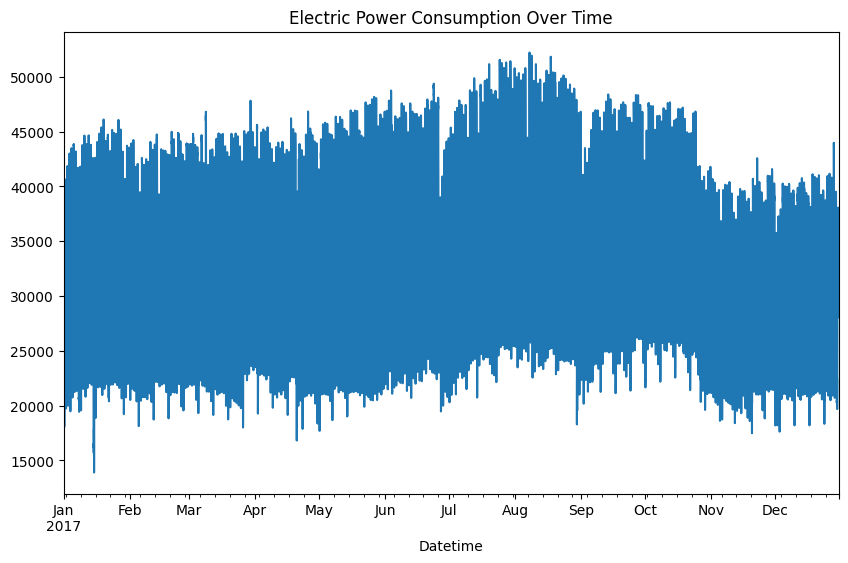

In [11]:
df['PowerConsumption_Zone1'].plot(figsize=(10, 6))
plt.title('Electric Power Consumption Over Time')
plt.show()


##Line plot visualizing the electric power consumption of Zone 2 over time.

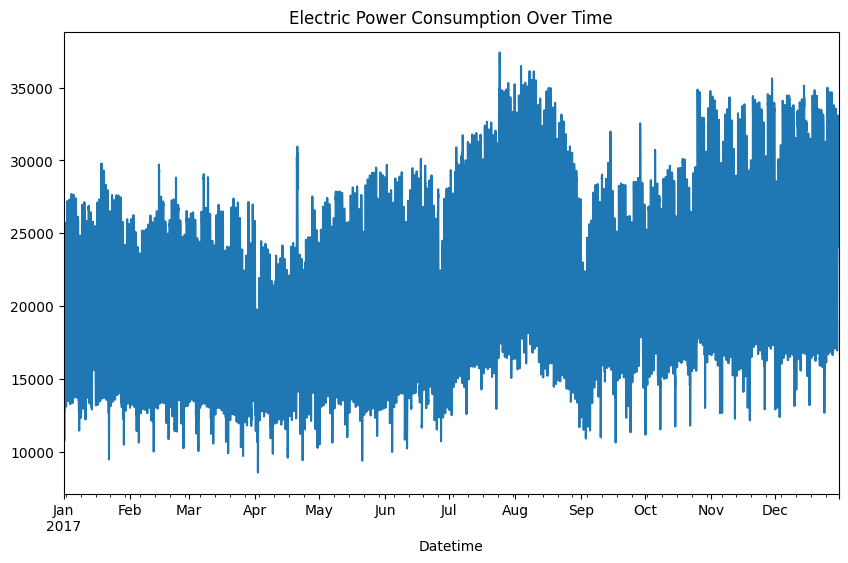

In [12]:
df['PowerConsumption_Zone2'].plot(figsize=(10, 6))
plt.title('Electric Power Consumption Over Time')
plt.show()

##Line plot visualizing the electric power consumption of Zone 3 over time.

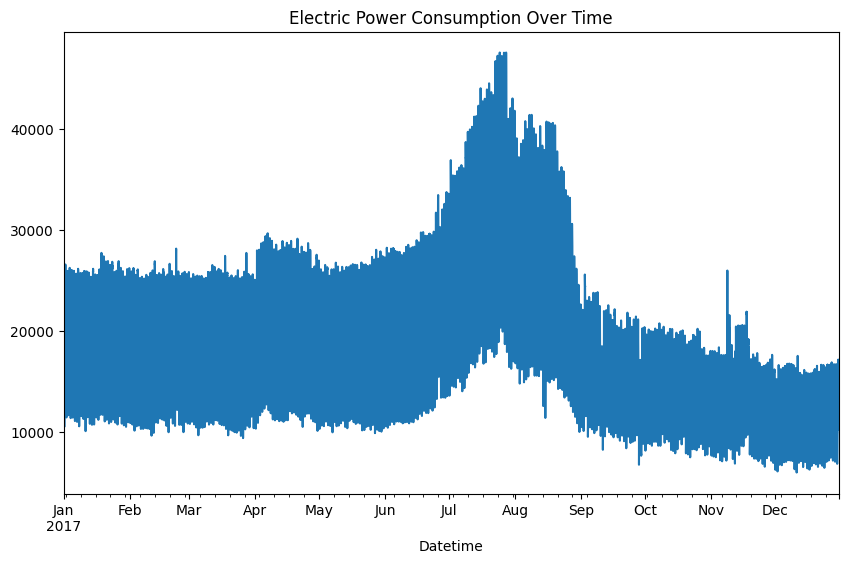

In [13]:
df['PowerConsumption_Zone3'].plot(figsize=(10, 6))
plt.title('Electric Power Consumption Over Time')
plt.show()

##Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for the 'PowerConsumption_Zone1'

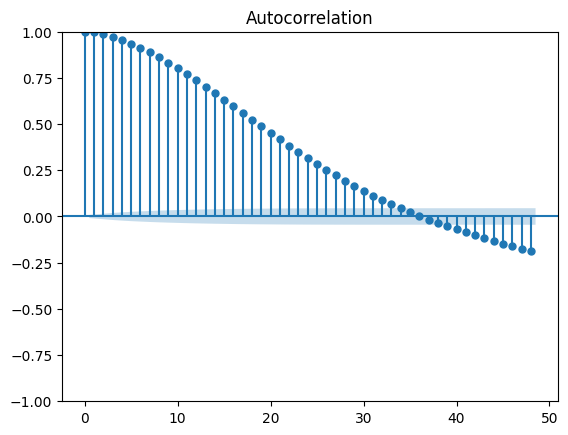

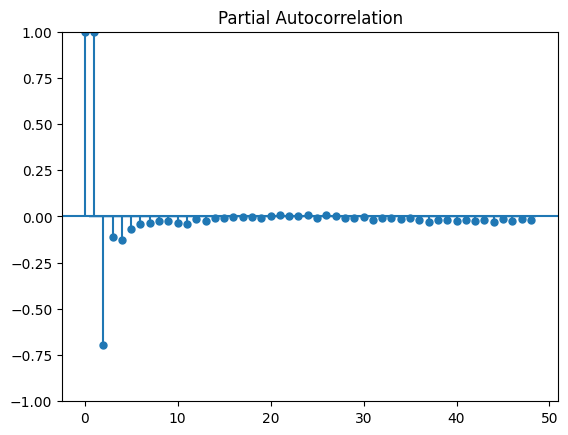

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for selecting p and q
plot_acf(df['PowerConsumption_Zone1'])
plt.show()

plot_pacf(df['PowerConsumption_Zone1'])
plt.show()

##Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for the 'PowerConsumption_Zone2'

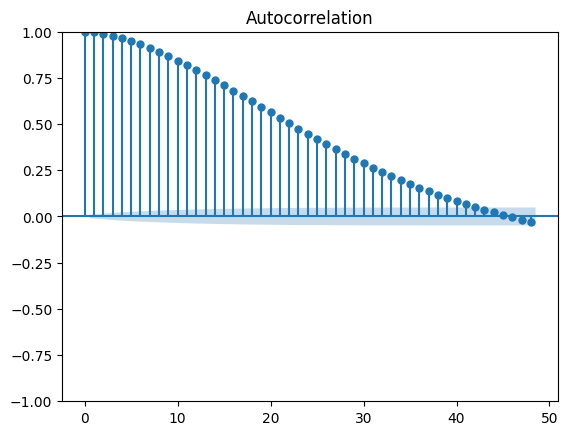

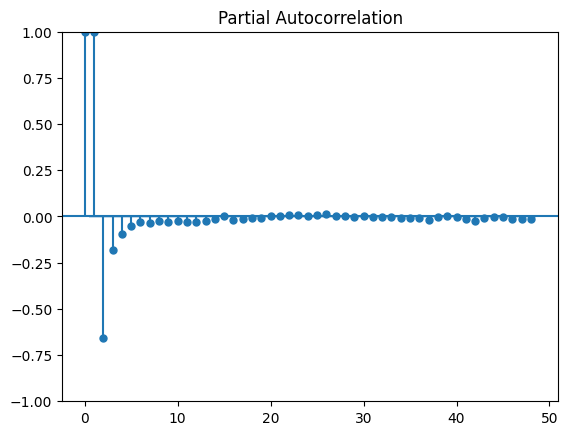

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for selecting p and q
plot_acf(df['PowerConsumption_Zone2'])
plt.show()

plot_pacf(df['PowerConsumption_Zone2'])
plt.show()

##Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for the 'PowerConsumption_Zone3'

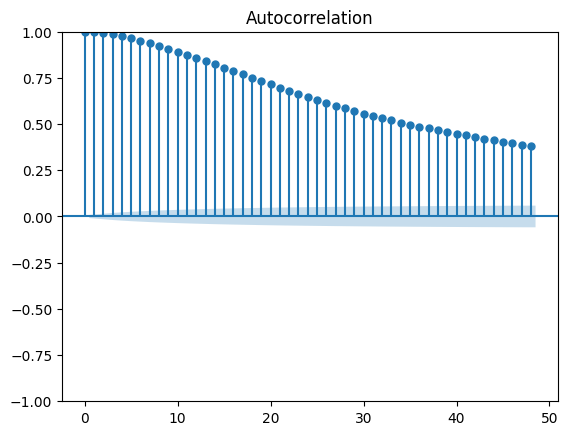

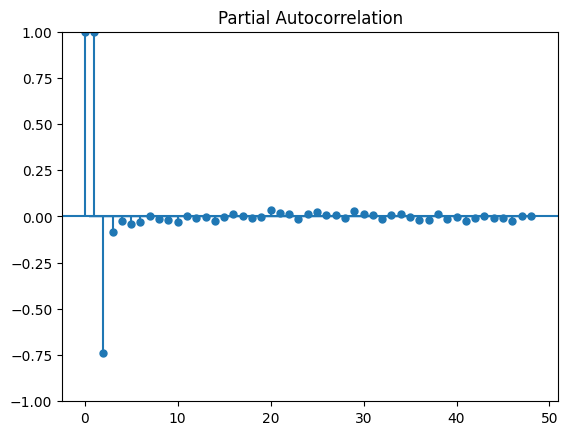

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for selecting p and q
plot_acf(df['PowerConsumption_Zone3'])
plt.show()

plot_pacf(df['PowerConsumption_Zone3'])
plt.show()

In [18]:
p, d, q = 1, 1, 1
#By setting p, d, and q to 1, 1, and 1, we are defining an ARIMA(1, 1, 1) model. This model:

#Uses one previous time step's value (AR component).
#Differences the data once to make it stationary (I component).
#Includes one previous error term (MA component).

#Predicting Power Consumption for Zone 1.

In [21]:
model = ARIMA(df['PowerConsumption_Zone1'], order=(p, d, q))
#It creates an ARIMA model instance with specified order (p, d, q) using power consumption data.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


In [22]:
model_fit = model.fit()
#This line essentially trains the ARIMA model on the power consumption data, allowing it to learn patterns and relationships within the time series.

In [23]:
forecast = model_fit.forecast(steps=30)
#This line instructs the fitted ARIMA model to predict the power consumption for the next 30 time periods.

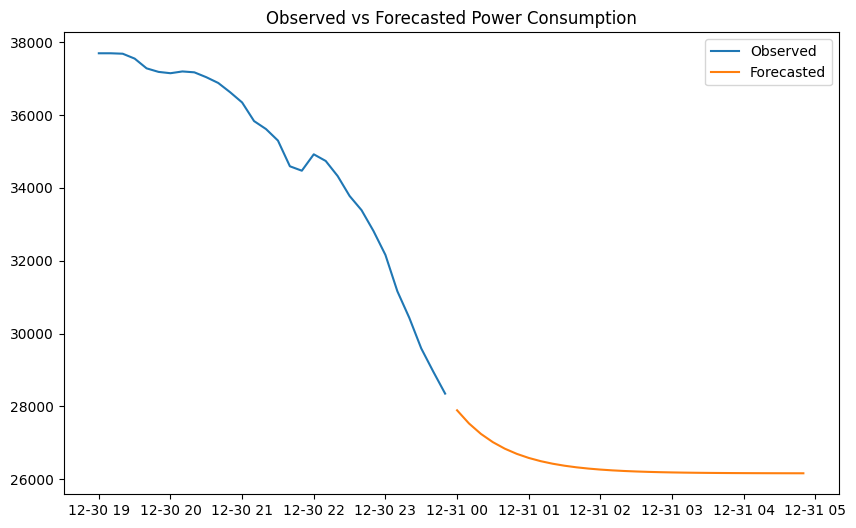

In [25]:
plt.figure(figsize=(10,6))
plt.plot(df['PowerConsumption_Zone1'][-30:], label='Observed')  # Last 30 observations
plt.plot(forecast, label='Forecasted')
plt.title('Observed vs Forecasted Power Consumption')
plt.legend()
plt.show()
#It plots observed and forecasted power consumption for the last 30 time steps for comparison.



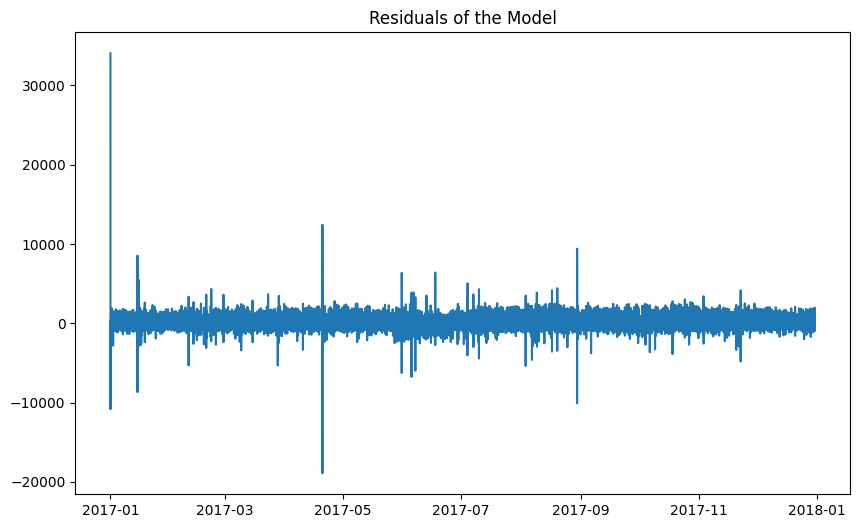

In [26]:
residuals = model_fit.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals of the Model')
plt.show()
#It plots the residuals of the ARIMA model to assess its fit to the data

In [29]:
mae = mean_absolute_error(df['PowerConsumption_Zone1'][-30:], forecast)
mse = mean_squared_error(df['PowerConsumption_Zone1'][-30:], forecast)
rmse = np.sqrt(mse)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')
#It calculates and prints the MAE, MSE, and RMSE to evaluate the forecast accuracy.

MAE: 8360.527532476419, MSE: 76281056.01691936, RMSE: 8733.902679611181


#Predicting Power Consumption for Zone 2.

In [30]:
model = ARIMA(df['PowerConsumption_Zone2'], order=(p, d, q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


In [31]:
model_fit = model.fit()


In [32]:
forecast = model_fit.forecast(steps=30)  # Example: forecast for next 30 time periods

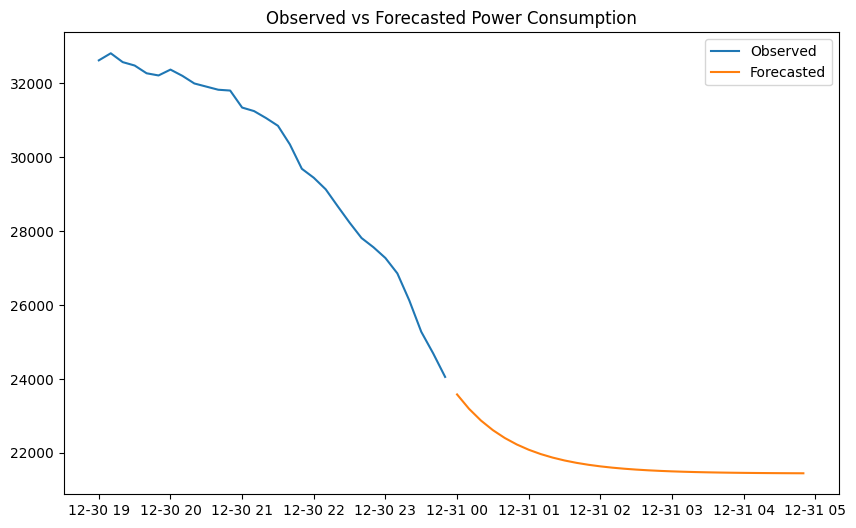

In [33]:
plt.figure(figsize=(10,6))
plt.plot(df['PowerConsumption_Zone2'][-30:], label='Observed')  # Last 30 observations
plt.plot(forecast, label='Forecasted')
plt.title('Observed vs Forecasted Power Consumption')
plt.legend()
plt.show()
#It plots observed and forecasted power consumption for the last 30 time steps for comparison.

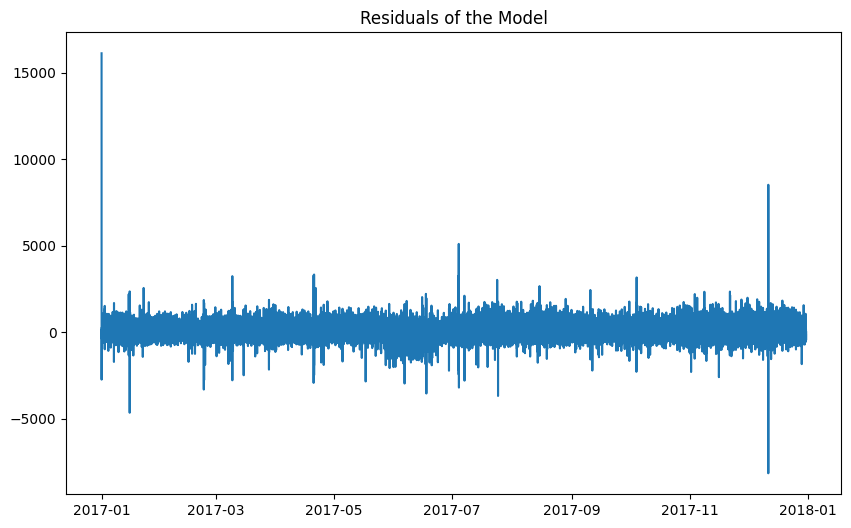

In [34]:
residuals = model_fit.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals of the Model')
plt.show()
#It plots the residuals of the ARIMA model to assess its fit to the data

In [35]:
mae = mean_absolute_error(df['PowerConsumption_Zone2'][-30:], forecast)
mse = mean_squared_error(df['PowerConsumption_Zone2'][-30:], forecast)
rmse = np.sqrt(mse)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')
#It calculates and prints the MAE, MSE, and RMSE to evaluate the forecast accuracy.

MAE: 8060.597005924618, MSE: 70182458.49712853, RMSE: 8377.497149932582


#Predicting Power Consumption for Zone 3.

In [36]:
model = ARIMA(df['PowerConsumption_Zone3'], order=(p, d, q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


In [37]:
forecast = model_fit.forecast(steps=30)  # Example: forecast for next 30 time periods

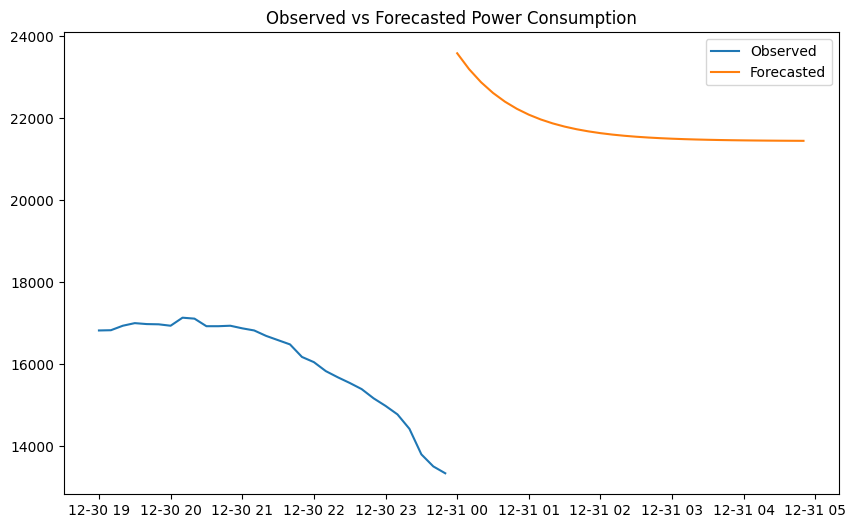

In [38]:
plt.figure(figsize=(10,6))
plt.plot(df['PowerConsumption_Zone3'][-30:], label='Observed')  # Last 30 observations
plt.plot(forecast, label='Forecasted')
plt.title('Observed vs Forecasted Power Consumption')
plt.legend()
plt.show()
#It plots observed and forecasted power consumption for the last 30 time steps for comparison.

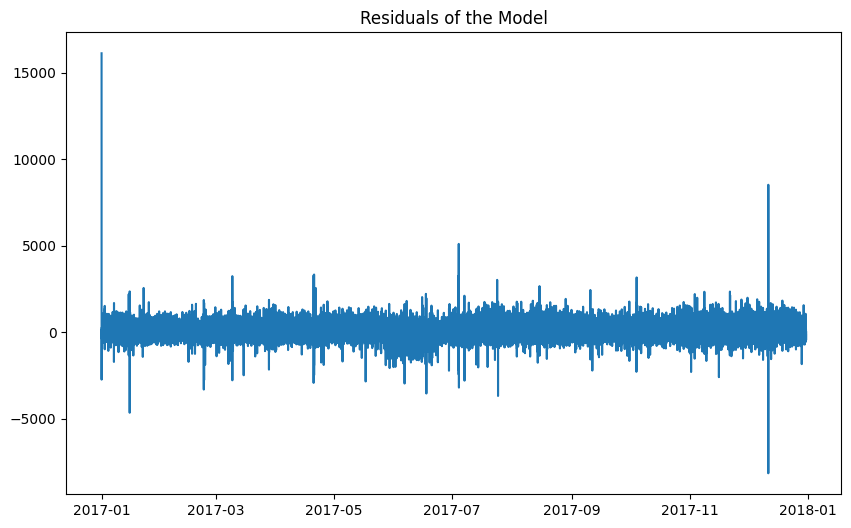

In [39]:
residuals = model_fit.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals of the Model')
plt.show()
#It plots the residuals of the ARIMA model to assess its fit to the data

In [41]:
mae = mean_absolute_error(df['PowerConsumption_Zone3'][-30:], forecast)
mse = mean_squared_error(df['PowerConsumption_Zone3'][-30:], forecast)
rmse = np.sqrt(mse)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')
#It calculates and prints the MAE, MSE, and RMSE to evaluate the forecast accuracy.

MAE: 5774.161076742049, MSE: 34278243.6333138, RMSE: 5854.762474542737
